# Coupled model

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import model
import pickle
import itertools
import networkx as nx
from itertools import product
from tqdm import tqdm, tqdm_notebook
%matplotlib inline

### Prepare data

In [2]:
prep_data = model.data_and_network_prep()

In [3]:
with open('../../data/vaccination_model/prep_data.pickle', 'wb') as p_out:
    pickle.dump(prep_data, p_out)

### Data for fit

In [453]:
# Create data for the fit
data_for_fit_i = model.create_data_for_fit_influenza()

In [454]:
data_for_fit_v = model.create_data_for_fit(prep_data)

## Network model

### Get Patameters

In [41]:
# Get parameters - vaccination model
with open('../../Data/vaccination_model/grid_search/grid_search_res.pickle', 'rb') as pickle_in:
# with open('../../Data/coupled_model/grid_search_homo/grid_search_homo_2016_m11_k1000_results.pickle', 'rb') as pickle_in:  # HOMOGENOUS
    grid_search_res = pickle.load(pickle_in)

# Max likelihood subdist
liklihood_subdist = max(grid_search_res, key=lambda x: x['log_likelihood_subdist'])

# Set parameters
parameters_vvv = liklihood_subdist['parameters']


In [ ]:
# parameters_v['beta'] = 0.01402
# For 30% coverage
# parameters_v['beta'] = 0.0203
# For 40% coverage
# parameters_v['beta'] = 0.025
# For 45 coverage
# parameters_v['beta'] = 0.028

In [47]:
0.028*0.38356614902224223

0.010739852172622784

In [43]:
parameters_vvv

{'beta': 0.016534620615599377,
 'delta': 0.38356614902224223,
 'gamma': 0.20840689843177979,
 'I_0_size': 0.001}

In [42]:
liklihood_subdist

{'parameters': {'beta': 0.016534620615599377,
  'delta': 0.38356614902224223,
  'gamma': 0.20840689843177979,
  'I_0_size': 0.001},
 'log_likelihood': 22892.00914133095,
 'log_likelihood_age': 93881.4253592024,
 'log_likelihood_subdist': 64237.72970598607}

In [39]:
# Get parameters - vaccination model
with open('../../Data/vaccination_model/grid_search/grid_search_res.pickle', 'rb') as pickle_in:
# with open('../../Data/coupled_model/grid_search/corrected/grid_search_2016_m11_k500_results.pickle', 'rb') as pickle_in:  # HOMOGENOUS
    grid_search_res = pickle.load(pickle_in)

# Max likelihood subdist
liklihood_subdist = max(grid_search_res, key=lambda x: x['log_likelihood_subdist'])

# Set parameters
parameters_iii = liklihood_subdist['parameters']


In [38]:
liklihood_subdist

{'parameters': {2011: {'beta': 0.0017287082426183863,
   'delta': 1,
   'phi': -3.695539123646315,
   'epsilon': 1},
  2012: {'beta': 0.001452898269764778,
   'delta': 1,
   'phi': -3.6782535625442243,
   'epsilon': 1},
  2013: {'beta': 0.0016733043927886326,
   'delta': 1,
   'phi': -3.960085304600348,
   'epsilon': 1},
  2014: {'beta': 0.0015676564791918932,
   'delta': 1,
   'phi': -4.05562360914305,
   'epsilon': 1},
  2015: {'beta': 0.0014265042119597725,
   'delta': 1,
   'phi': -3.707166269995406,
   'epsilon': 1},
  2016: {'beta': 0.0016599141101075758,
   'delta': 1,
   'phi': -3.842514569385793,
   'epsilon': 1},
  2017: {'beta': 0.0014723103614892473,
   'delta': 1,
   'phi': -4.032090426247181,
   'epsilon': 1}},
 'log_likelihood_subdist': 23685.01692769133}

In [20]:
parameters_iii

{2016: {'beta': 8.562004515358724e-07,
  'delta': 1,
  'phi': -4.017357948282391,
  'epsilon': 1}}

In [28]:
print(f'{parameters_iii[2016]["beta"]:.10f}')

0.0000008562


In [3]:
# Load parameteres
with open('../../data/coupled_model/parameters_updated.pickle', 'rb') as pickle_in:
    parameters = pickle.load(pickle_in)

parameters_i = parameters['i']
parameters_v = parameters['v']

In [445]:
parameters_i = {}
max_likelihoods = {}

# 2013-2016
for season in model.seasons:
    # Load grid search file
    with open(f'L:/Dor/data/coupled_model/grid_search/corrected/grid_search_{season}_m11_k500_results.pickle', 'rb') as pickle_in:
        grid_search_res_i = pickle.load(pickle_in)
    
    # Get max likelihhod parameters
    liklihood_subdist_i = max(grid_search_res_i, key=lambda x: x['log_likelihood_subdist'])
    
    # Update parameters dictionary
    parameters_i[season] = liklihood_subdist_i['parameters'][season]
    
    # Update likelihoods
    max_likelihoods[season] = liklihood_subdist_i['log_likelihood_subdist']

In [449]:
max_likelihoods

{2011: 25676.17355680652,
 2012: 6645.295124895659,
 2013: 20785.260055026094,
 2014: 14235.311724006167,
 2015: 13516.775762137417,
 2016: 23685.01692769133,
 2017: 11355.742885831502}

In [223]:
parameters_updated = {'i': parameters_i, 'v': parameters_v}

with open('../../data/coupled_model/parameters_updated.pickle', 'wb') as pickle_out:
    pickle.dump(parameters_updated, pickle_out)

In [224]:
parameters_updated

{'i': {2011: {'beta': 0.0017439933794697975,
   'delta': 1,
   'phi': -3.8496248097959285,
   'epsilon': 1},
  2012: {'beta': 0.001507981017190238,
   'delta': 1,
   'phi': -3.862254050627921,
   'epsilon': 1},
  2013: {'beta': 0.0015808716649371173,
   'delta': 1,
   'phi': -3.810887096610024,
   'epsilon': 1},
  2014: {'beta': 0.0015466872633363245,
   'delta': 1,
   'phi': -4.148064848239552,
   'epsilon': 1},
  2015: {'beta': 0.001557148532982239,
   'delta': 1,
   'phi': -3.9360415454025985,
   'epsilon': 1},
  2016: {'beta': 0.0016599141101075758,
   'delta': 1,
   'phi': -3.842514569385793,
   'epsilon': 1},
  2017: {'beta': 0.001506789581745528,
   'delta': 1,
   'phi': -3.505642489452133,
   'epsilon': 1}},
 'v': {'beta': 0.016534620615599377,
  'delta': 0.38356614902224223,
  'gamma': 0.20840689843177979,
  'I_0_size': 0.001}}

In [217]:
# 2012   
with open('L:/Dor/data/coupled_model/grid_search/corrected/grid_search_2011_m11_k500_results.pickle', 'rb') as pickle_in:
    grid_search_res_2011 = pickle.load(pickle_in)
    
# 2012   
with open('L:/Dor/data/coupled_model/grid_search/corrected/grid_search_2012_m11_k500_results.pickle', 'rb') as pickle_in:
    grid_search_res_2012 = pickle.load(pickle_in)
    
# 2013   
with open('L:/Dor/data/coupled_model/grid_search/corrected/grid_search_2013_m11_k500_results.pickle', 'rb') as pickle_in:
    grid_search_res_2013 = pickle.load(pickle_in)
    
# 2014   
with open('L:/Dor/data/coupled_model/grid_search/corrected/grid_search_2014_m11_k500_results.pickle', 'rb') as pickle_in:
    grid_search_res_2014 = pickle.load(pickle_in)
    
# 2015   
with open('L:/Dor/data/coupled_model/grid_search/corrected/grid_search_2015_m11_k500_results.pickle', 'rb') as pickle_in:
    grid_search_res_2015 = pickle.load(pickle_in)
    
# 2016   
with open('L:/Dor/data/coupled_model/grid_search/corrected/grid_search_2016_m11_k500_results.pickle', 'rb') as pickle_in:
    grid_search_res_2016 = pickle.load(pickle_in)
    
# 2017   
with open('L:/Dor/data/coupled_model/grid_search/corrected/grid_search_2017_m11_k500_results.pickle', 'rb') as pickle_in:
    grid_search_res_2017 = pickle.load(pickle_in)

In [218]:
# Max likelihood subdist
liklihood_subdist_2011 = max(grid_search_res_2011, key=lambda x: x['log_likelihood_subdist'])

print(f"Max likelihood by subdist: {int(liklihood_subdist_2011['log_likelihood_subdist']):,d}")
# print(liklihood_subdist_2011)

# Max likelihood subdist
liklihood_subdist_2012 = max(grid_search_res_2012, key=lambda x: x['log_likelihood_subdist'])

print(f"Max likelihood by subdist: {int(liklihood_subdist_2012['log_likelihood_subdist']):,d}")
# print(liklihood_subdist_2012)

# Max likelihood subdist
liklihood_subdist_2013 = max(grid_search_res_2013, key=lambda x: x['log_likelihood_subdist'])

print(f"Max likelihood by subdist: {int(liklihood_subdist_2013['log_likelihood_subdist']):,d}")
# print(liklihood_subdist_2013)

# Max likelihood subdist
liklihood_subdist_2014 = max(grid_search_res_2014, key=lambda x: x['log_likelihood_subdist'])

print(f"Max likelihood by subdist: {int(liklihood_subdist_2014['log_likelihood_subdist']):,d}")
# print(liklihood_subdist_2014)

# Max likelihood subdist
liklihood_subdist_2015 = max(grid_search_res_2015, key=lambda x: x['log_likelihood_subdist'])

print(f"Max likelihood by subdist: {int(liklihood_subdist_2015['log_likelihood_subdist']):,d}")
# print(liklihood_subdist_2015)

# Max likelihood subdist
liklihood_subdist_2016 = max(grid_search_res_2016, key=lambda x: x['log_likelihood_subdist'])

print(f"Max likelihood by subdist: {int(liklihood_subdist_2016['log_likelihood_subdist']):,d}")
# print(liklihood_subdist_2016)

# Max likelihood subdist
liklihood_subdist_2017 = max(grid_search_res_2017, key=lambda x: x['log_likelihood_subdist'])

print(f"Max likelihood by subdist: {int(liklihood_subdist_2017['log_likelihood_subdist']):,d}")
# print(liklihood_subdist_2017)

Max likelihood by subdist: 25,676
Max likelihood by subdist: 6,645
Max likelihood by subdist: 20,785
Max likelihood by subdist: 14,235
Max likelihood by subdist: 13,516
Max likelihood by subdist: 23,685
Max likelihood by subdist: 11,355


In [ ]:
{2011: 25680.30347994885,
 2012: 6802.081990843844,
 2013: 20692.573126474173,
 2014: 14330.364836244316,
 2015: 13368.259347393756,
 2016: 23606.825638159233,
 2017: 11182.21193947767}

In [ ]:
{2011: 24918.501796719727,
 2012: 5817.579410315076,
 2013: 19988.16143098794,
 2014: 13277.686542215024,
 2015: 12863.04238723817,
 2016: 22711.509232447097,
 2017: 10971.531458577714}

### Run network model

In [456]:
season = 2016
model_results = model.run_coupled_model(parameters_i, parameters_v, prep_data, season)

In [457]:
print(f'log-likelihood by clinic and age: {int(model.log_likelihood_influenza(model_results["lambdas"],\
        data_for_fit_i["by_clinic_age"], season)):,d}')

print(f'log-likelihood by subdist and age: {int(model.log_likelihood_agg_by_subdist_influenza(model_results["lambdas"],\
        data_for_fit_i["by_subdist"], season, prep_data)):,d}')

print(f'log-likelihood by age: {int(model.log_likelihood_agg_age_influenza(model_results, data_for_fit_i, season)):,d}')

log-likelihood by clinic and age: -9,761
log-likelihood by subdist and age: 20,997
log-likelihood by age: 40,543


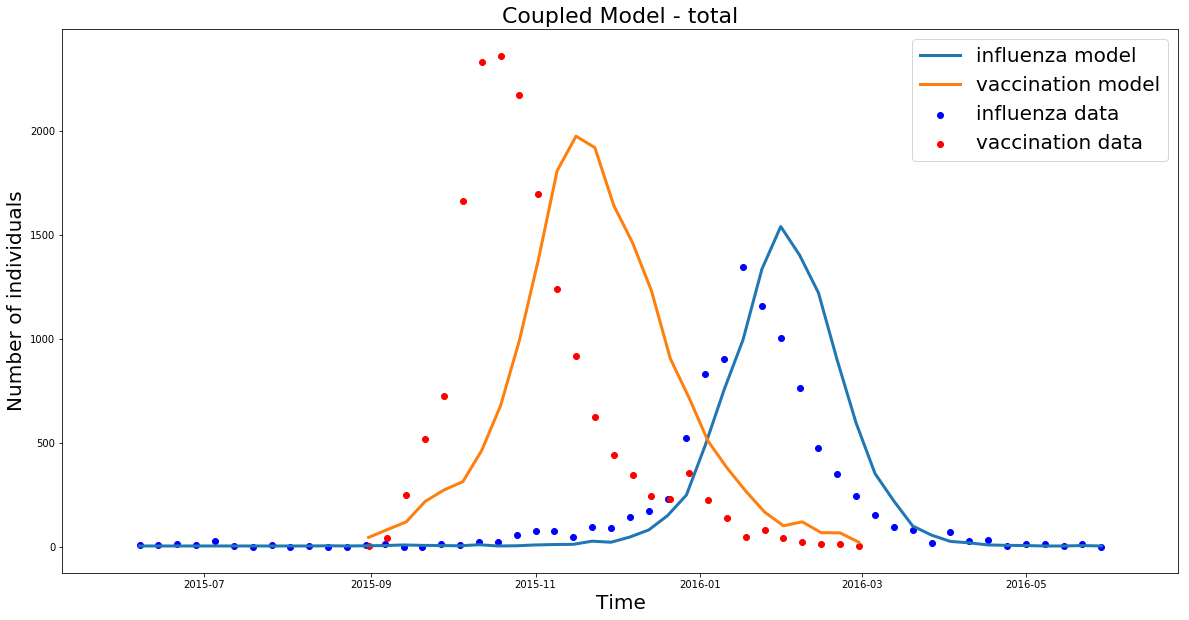

In [458]:
model.plot_aggregated_fit_coupled(model_results, data_for_fit_i, data_for_fit_v, season, prep_data)
# model.plot_aggregated_fit_coupled(model_results, data_for_fit_i, data_for_fit_v, season, prep_data, age=0)
# model.plot_aggregated_fit_coupled(model_results, data_for_fit_i, data_for_fit_v, season, prep_data, age=1)

In [17]:
season = 2015
model_results = model.run_coupled_model(parameters_i, parameters_v, prep_data, season)

In [18]:
print(f'log-likelihood by clinic and age: {int(model.log_likelihood_influenza(model_results["lambdas"],\
        data_for_fit_i["by_clinic_age"], season)):,d}')

print(f'log-likelihood by subdist and age: {int(model.log_likelihood_agg_by_subdist_influenza(model_results["lambdas"],\
        data_for_fit_i["by_subdist"], season, prep_data)):,d}')

print(f'log-likelihood by age: {int(model.log_likelihood_agg_age_influenza(model_results, data_for_fit_i, season)):,d}')

log-likelihood by clinic and age: -13,232
log-likelihood by subdist and age: 12,726
log-likelihood by age: 29,582


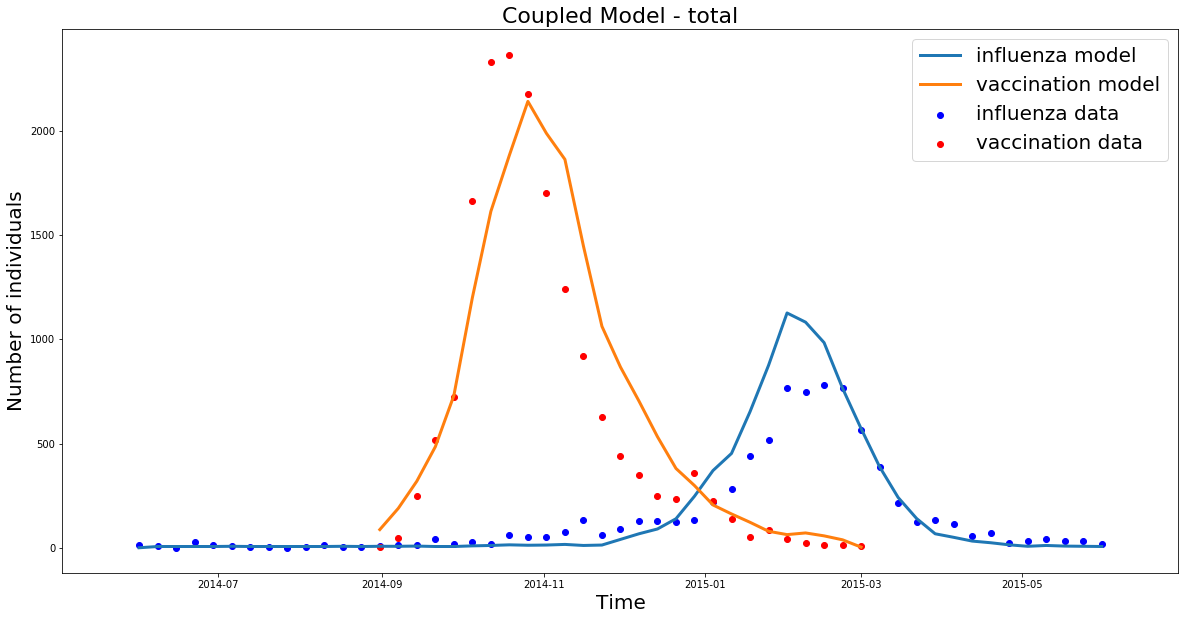

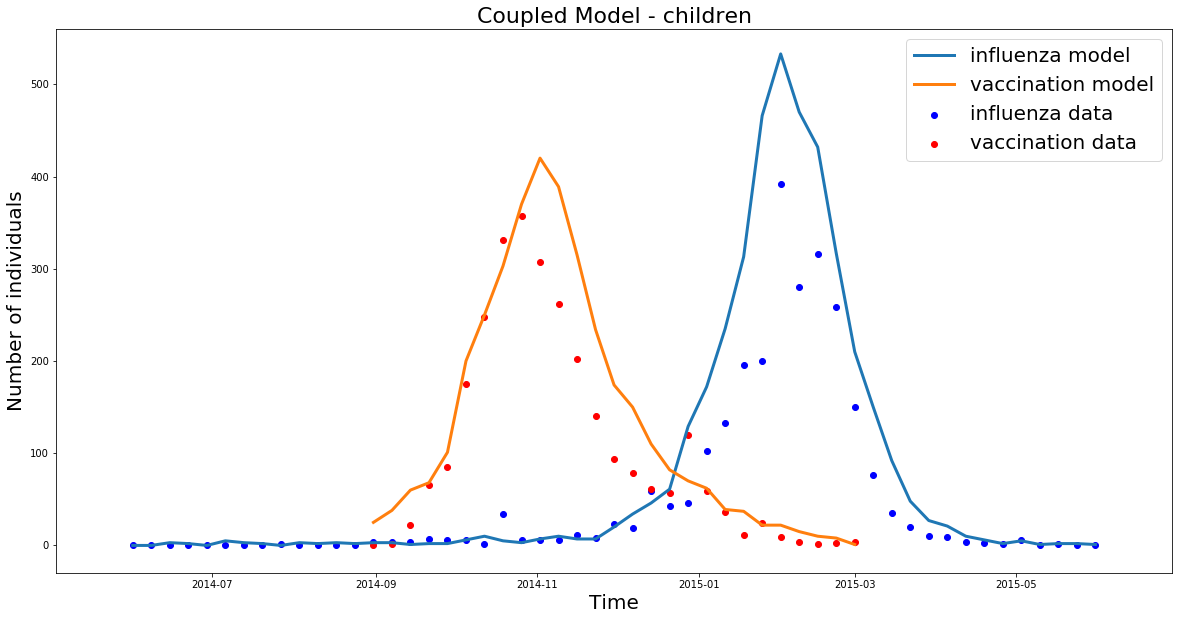

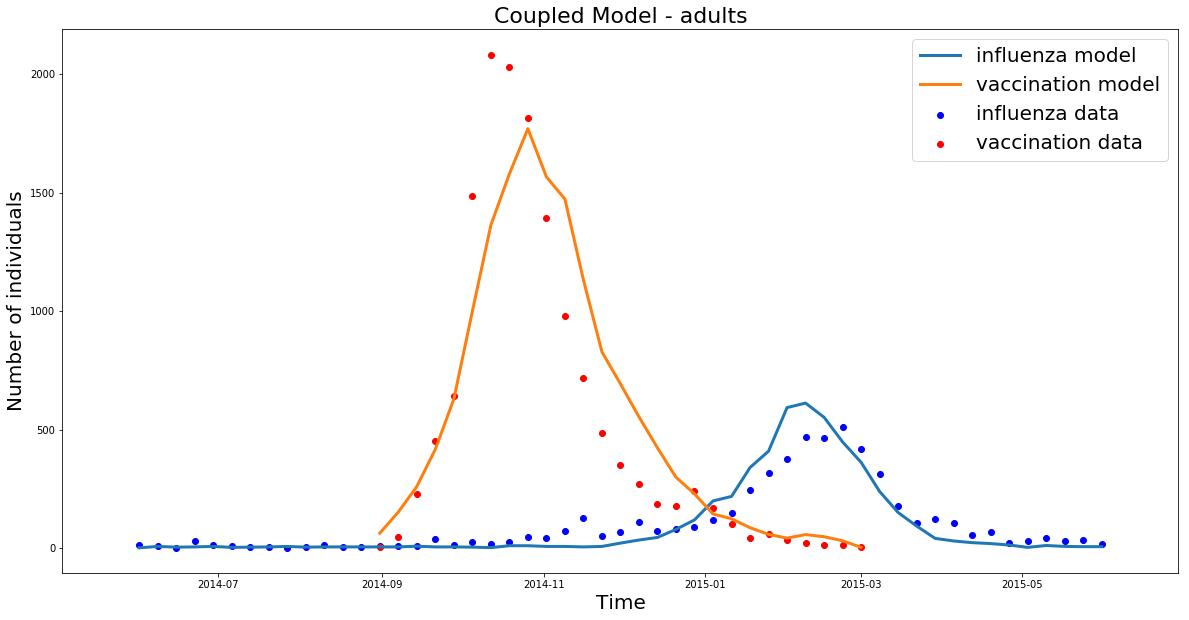

In [19]:
model.plot_aggregated_fit_coupled(model_results, data_for_fit_i, data_for_fit_v, season, prep_data)
model.plot_aggregated_fit_coupled(model_results, data_for_fit_i, data_for_fit_v, season, prep_data, age=0)
model.plot_aggregated_fit_coupled(model_results, data_for_fit_i, data_for_fit_v, season, prep_data, age=1)

In [ ]:
0.0016200311069644448
-3.564040903378586

In [205]:
# parameters_v['beta'] = 0.022
parameters_v['beta'] = 0.016534620615599377

parameters_i[2016]['beta'] = 0.002
# parameters_i[2016]['beta'] = 0.0017
parameters_i[2016]['phi'] = -4.6
# parameters_i[2016]['phi'] = -3.564040903378586

In [62]:
2*np.pi*(40/52)

4.8332194670612205

In [168]:
model_results1 = model.run_coupled_model(parameters_i, parameters_v, prep_data, season)

In [173]:
model_results2 = model.run_coupled_model(parameters_i, parameters_v, prep_data, season)

In [206]:
model_results3 = model.run_coupled_model(parameters_i, parameters_v, prep_data, season, vacc_start=122)

In [174]:
sum([len(s) for s in model_results1['new_Is']])

17271

In [175]:
sum([len(s) for s in model_results2['new_Is']])

16394

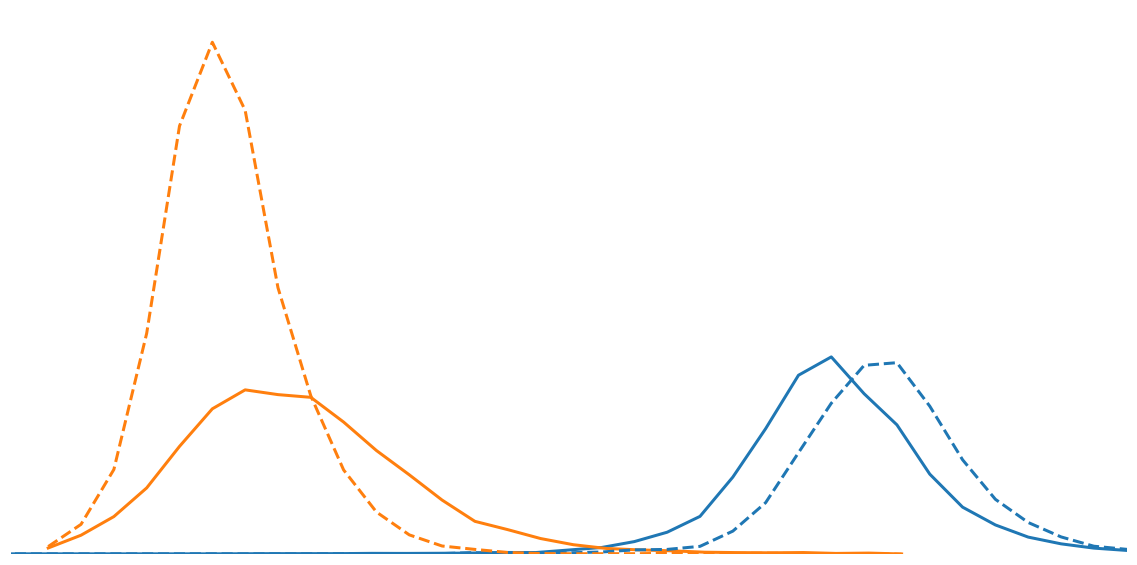

In [209]:
plot_aggregated_fit_coupled(model_results1, model_results2, data_for_fit_i, data_for_fit_v, season, prep_data)

In [212]:
# plot_aggregated_fit_coupled(model_results1, model_results3, data_for_fit_i, data_for_fit_v, season, prep_data, vacc_start=122)

In [98]:
with open('../../Data/coupled_model/res_for_low_vs_high_graph.pickle', 'rb') as pickle_in:
    res1, res2 = pickle.load(pickle_in)

In [418]:
get_model_weekly_cases = model.get_model_weekly_cases
get_coupled_model_weekly_vacc = model.get_coupled_model_weekly_vacc

def plot_aggregated_fit_coupled(model_results, model_results2, data_for_fit_i, data_for_fit_v, season, prep_data, age=None, vacc_start=92):
    # Influenza model
    # Get season length
    short = len(model_results['new_Is']) < 366

    model_weekly_cases = get_model_weekly_cases(model_results, season, short=short)

#     fig = plt.figure(figsize=(25, 12))
    fig, ax = plt.subplots(figsize=(25, 12))

    plt.plot(model_weekly_cases.index[12:44], model_weekly_cases.cases[12:44], linewidth=3, label='influenza cases', color='C0')

    # Vaccination model
    # Get data to plot and model results

    model_weekly_vacc = get_coupled_model_weekly_vacc(model_results, prep_data)*0.4

    # Time steps
    # Get vaccination season start date
    start_date = pd.Timestamp(season - 1, 6, 1) + pd.Timedelta(days=92 - 1)
    # Get the season range - form start date
    dates = [start_date + pd.Timedelta(days=7) * i for i in range(27)]

    # Plot vaccinated
    plt.plot(dates, model_weekly_vacc, linewidth=3, label='vaccination', color='C1')
    
    # Plot diffs
    diff_a = np.argmax(np.array(model_weekly_vacc))
    diff_b = np.argmax(model_weekly_cases.cases.values)
    plt.hlines(-500, dates[diff_a], model_weekly_cases.index[diff_b], linewidth=3, color='C3', linestyle='-')
    
    plt.arrow(dates[diff_a], -500, 0, 300, width=0.3, head_width=3,
              head_length=100, color='C3')
    plt.arrow(model_weekly_cases.index[diff_b], -500, 0, 300, width=0.3,
              head_width=3, head_length=100, color='C3')

    
#     plt.vlines([dates[diff_a], model_weekly_cases.index[diff_b]], [-500,-500],
#                [max(np.array(model_weekly_vacc)), max(model_weekly_cases.cases.values)],
#                linewidth=3, color='C3', linestyle='-')

    ##########################################################################################
    ##########################################################################################
    ##########################################################################################
    
    model_weekly_cases = get_model_weekly_cases(model_results2, season, short=short)


    plt.plot(model_weekly_cases.index[12:44], model_weekly_cases.cases.values[12:44], linewidth=3, color='C0', linestyle='--')

    # Vaccination model
    # Get data to plot and model results

    model_weekly_vacc = get_coupled_model_weekly_vacc(model_results2, prep_data)*0.4

    # Time steps
    # Get vaccination season start date
    start_date = pd.Timestamp(season - 1, 6, 1) + pd.Timedelta(days=vacc_start - 1)
    # Get the season range - form start date
    dates = [start_date + pd.Timedelta(days=7) * i for i in range(27)]

    # Plot vaccinated
    plt.plot(dates, model_weekly_vacc, linewidth=3, color='C1', linestyle='--')
    
    # Plot diffs
    diff_a = np.argmax(np.array(model_weekly_vacc))
    diff_b = np.argmax(model_weekly_cases.cases.values)
    plt.hlines(-800, dates[diff_a], model_weekly_cases.index[diff_b], linewidth=3, color='C3', linestyle='--')
    
    plt.arrow(dates[diff_a], -800, 0, 600, width=0.3, head_width=3,
              head_length=100, color='C3')
    plt.arrow(model_weekly_cases.index[diff_b], -800, 0, 600, width=0.3,
              head_width=3, head_length=100, color='C3')


#     plt.vlines([dates[diff_a], model_weekly_cases.index[diff_b]], [-1000,-1000],
#            [max(np.array(model_weekly_vacc)), max(model_weekly_cases.cases.values)],
#            linewidth=3, color='C3', linestyle='--')
    
    
    # for legend
    plt.plot([0,1], [-1,-1], linewidth=3, color='black', linestyle='-', label='low coverage')
    plt.plot([0,1], [-1,-1], linewidth=3, color='black', linestyle='--', label='high coverage')
       
    plt.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.xlim([model_weekly_cases.index[11], model_weekly_cases.index[45]])
    plt.ylim([-900,3000])
    plt.axis('off')
    
#     # Hide the right and top spines
#     ax.spines['right'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
#     ax.spines['top'].set_visible(False)
    
#     plt.hlines(0, model_weekly_cases.index[0], model_weekly_cases.index[-1], linewidth=5)
#     plt.vlines(model_weekly_cases.index[11], 0, 20000, linewidth=5)
    # Plot arrows for axis
    plt.arrow(model_weekly_cases.index[11] + pd.Timedelta(hours=45), -70, 233, 0, width=10,
          head_width=110, head_length=2.5, color='black')
    plt.arrow(model_weekly_cases.index[11] + pd.Timedelta(hours=45), -70, 0, 2950, width=0.3,
      head_width=2.667, head_length=100, color='black')
    
    # Axis labels
    plt.text(model_weekly_cases.index[10], 2100 , 'Number of individuals\n',
             {'size': 28, 'rotation': 'vertical', 'fontweight': 'normal'})
    
    plt.text(model_weekly_cases.index[25], -320 , 'Time',
         {'size': 28, 'fontweight': 'normal'})
    
    plt.legend(fontsize=30, frameon=False)

    plt.show()

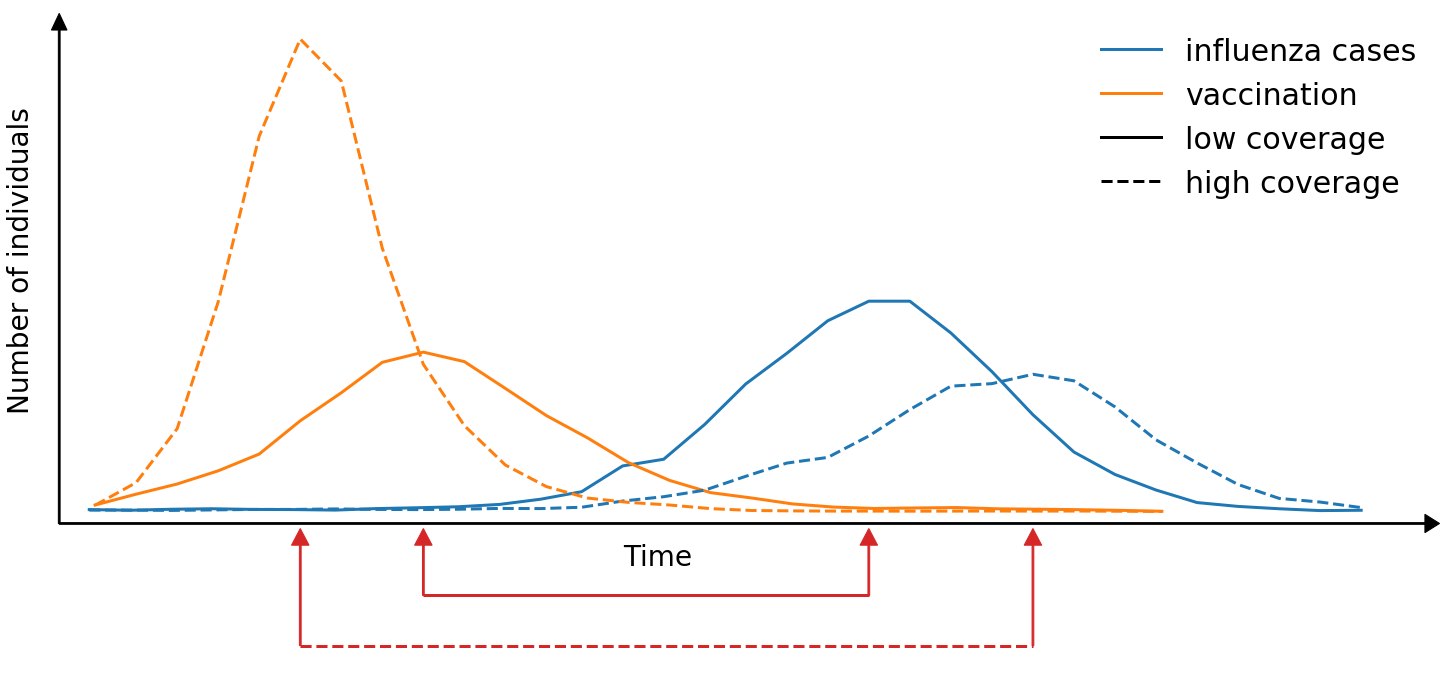

In [419]:
plot_aggregated_fit_coupled(res1, res2, data_for_fit_i, data_for_fit_v, 2016, prep_data)

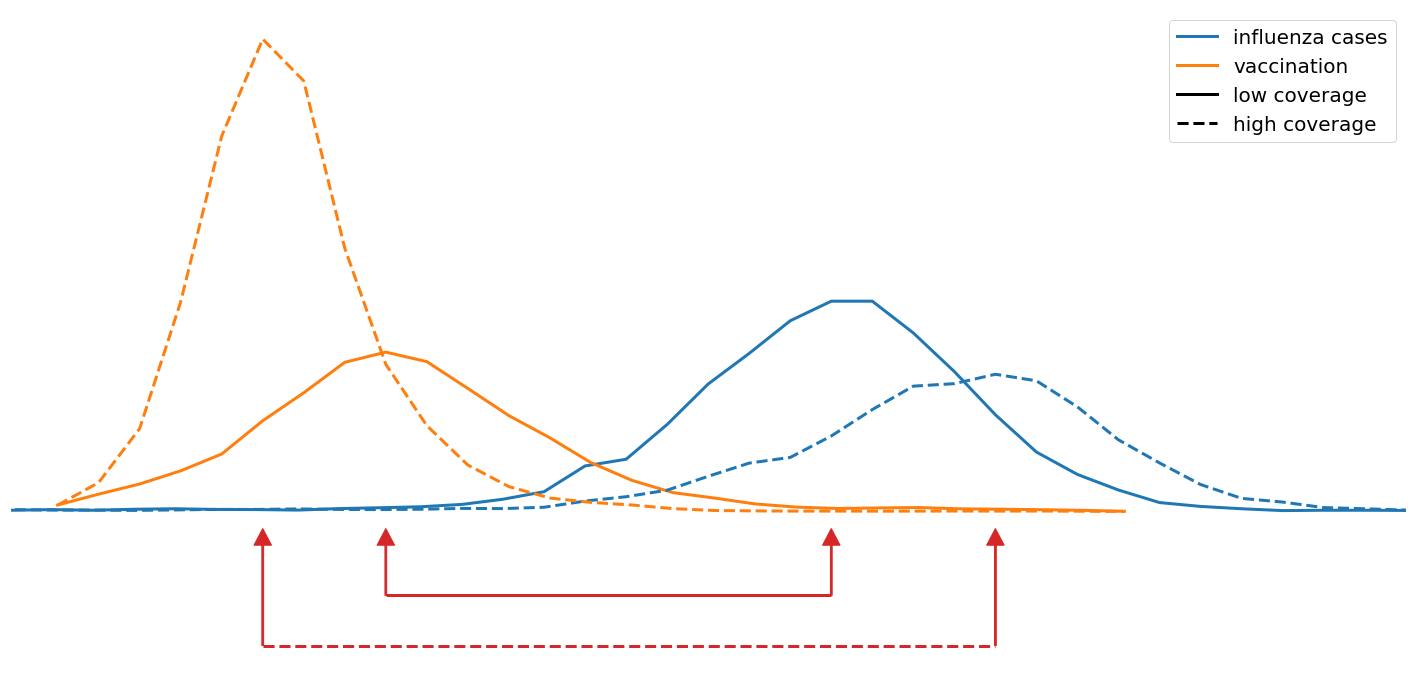

In [440]:
plot_aggregated_fit_coupled(res1, res2, data_for_fit_i, data_for_fit_v, season, prep_data)

In [336]:
parameters_v['beta'] = 0.022
# parameters_v['beta'] = 0.016534620615599377

In [215]:
# res1 = model.run_coupled_model(parameters_i, parameters_v, prep_data, season)

In [222]:
# res2 = model.run_coupled_model(parameters_i, parameters_v, prep_data, season)

In [441]:
with open('../../Data/coupled_model/res_for_low_vs_high_graph.pickle', 'wb') as pickle_in:
    pickle.dump([res1, res2], pickle_in)

In [266]:
# model.plot_infection_rate_by_age_influenza(model_results, data_for_fit_i, prep_data, season)

In [15]:
# model.plot_infection_rate_influenza(model_results, prep_data, season=season)

Plot influenza

In [30]:
# model.plot_aggregated_fit_influenza(model_results, data_for_fit, season)
# model.plot_aggregated_fit_influenza(model_results, data_for_fit, season, age=0)
# model.plot_aggregated_fit_influenza(model_results, data_for_fit, season, age=1)

Plot vaccination

In [31]:
# model_results['new_I'] = model_results['new_Iv'][:182]
# model_results['new_I_by_age'] = [model_results['new_Iv_by_age'][0][:182], model_results['new_Iv_by_age'][1][:182]]
# model.plot_aggregated_fit(model_results, data_for_fit_v)
# model.plot_aggregated_fit(model_results, data_for_fit_v, age=0)
# model.plot_aggregated_fit(model_results, data_for_fit_v, age=1)

### Run network model - all seasons

In [16]:
model_results_all_seasons = [model.run_coupled_model(parameters_i, parameters_v, prep_data, season) for season in model.seasons]

In [17]:
model_results_all_seasons2 = [model.run_coupled_model(parameters_i, parameters_v, prep_data, season) for season in model.seasons]

In [18]:
model_results_list = [model_results_all_seasons, model_results_all_seasons2]

In [24]:
likelihood_lists = model.calculate_likelihood_lists_all_seasons(model_results_list, data_for_fit_i, prep_data)

In [24]:
with open(f'L:/Dor/Data/coupled_model/model_results/model_results_m5_1__.pickle', 'rb') as pickle_in:
        model_results_all = pickle.load(pickle_in)

model_results_list = [res['model_results'] for res in model_results_all]

likelihood_lists = {season: [] for season in model.seasons}
for res in model_results_all:
    for season, likelihood in res['likelihood_by_season'].items():
        likelihood_lists[season].append(likelihood)

In [26]:
model_results_all_seasons = model_results_list[0]

### Aggregated plot - all seasons

In [28]:
# model.plot_aggregated_fit_coupled_all_seasons(model_results_all_seasons, data_for_fit_i, data_for_fit_v, prep_data)
# model.plot_aggregated_fit_coupled_all_seasons(model_results_all_seasons, data_for_fit_i, data_for_fit_v, prep_data, age=0)
# model.plot_aggregated_fit_coupled_all_seasons(model_results_all_seasons, data_for_fit_i, data_for_fit_v, prep_data, age=1)

### Subdistrct plot - all seasons

In [30]:
# model.plot_fit_by_subdist_coupled(model_results_all_seasons, data_for_fit_i, data_for_fit_v, prep_data)

### Aggregated plot - all seasons - with cloud

In [32]:
# model.plot_aggregated_fit_coupled_with_cloud(model_results_list, likelihood_lists,
#                                              data_for_fit_i, data_for_fit_v, prep_data)
# model.plot_aggregated_fit_coupled_with_cloud([model_results_all_seasons, model_results_all_seasons2], likelihood_lists,
#                                              data_for_fit_i, data_for_fit_v, prep_data, age=0)
# model.plot_aggregated_fit_coupled_with_cloud([model_results_all_seasons, model_results_all_seasons2], likelihood_lists,
#                                              data_for_fit_i, data_for_fit_v, prep_data, age=1)

### Subdistrct plot - all seasons - with cloud

In [34]:
# model.plot_fit_by_subdist_coupled_with_cloud(model_results_list, likelihood_lists, data_for_fit_i, data_for_fit_v, prep_data)

## Homogenous model

### Get Patameters

#### Vaccination model

In [5]:
with open('L:/Dor/Data/vaccination_model/grid_search/grid_search_res_homo.pickle', 'rb') as pickle_in:
    grid_search_res_homo_v = pickle.load(pickle_in)

In [6]:
# Max likelihood age
liklihood_age_homo_v = max(grid_search_res_homo_v, key=lambda x: x['log_likelihood_subdist'])

print(f"Max likelihood by subdist: {int(liklihood_age_homo_v['log_likelihood_subdist']):,d}")
print(liklihood_age_homo_v)

Max likelihood by subdist: 64,030
{'parameters': {'beta': 8.655725758096305e-06, 'delta': 0.5215131068870331, 'gamma': 0.39114010315182385, 'I_0_size': 0.001}, 'log_likelihood_subdist': 64030.963005722035}


#### Influenza model

In [98]:
# 2016
with open('L:/Dor/Data/coupled_model/grid_search_homo/grid_search_homo_2016_m11_k1000_results.pickle', 'rb') as pickle_in:
    grid_search_res_homo_i = pickle.load(pickle_in)

In [99]:
# Max likelihood subdist
liklihood_subdist_i_homo = max(grid_search_res_homo_i, key=lambda x: x['log_likelihood_subdist'])

print(f"Max likelihood by subdist: {int(liklihood_subdist_i_homo['log_likelihood_subdist']):,d}")
print(liklihood_subdist_i_homo)

Max likelihood by subdist: 21,782
{'parameters': {2016: {'beta': 8.562004515358724e-07, 'delta': 1, 'phi': -4.017357948282391, 'epsilon': 1}}, 'log_likelihood_subdist': 21782.90123343693}


In [9]:
parameters_v_homo = liklihood_age_homo_v['parameters']

In [10]:
# # season
# season = 2016

# # Set parameters
# parameters_v_homo = liklihood_age_homo_v['parameters']
# parameters_i_homo = liklihood_subdist_i_homo['parameters']

In [100]:
season = 2016

parameters_v_homo = liklihood_age_homo_v['parameters']
parameters_i_homo = liklihood_subdist_i_homo['parameters']
# parameters_i_homo = {2016: {'beta': 0.000000675-0.000000675/10,
#   'delta': 1,
#   'phi': -3.648222457322053,
#   'epsilon': 1}}

In [96]:
8.634876562922017e-07 - 0.000000675

1.8848765629220168e-07

In [79]:
(2*np.pi)*(27/52)

3.262423140266324

In [80]:
# {2011: 25680.30347994885,
#  2012: 6802.081990843844,
#  2013: 20692.573126474173,
#  2014: 14330.364836244316,
#  2015: 13368.259347393756,
#  2016: 23606.825638159233,
#  2017: 11182.21193947767}

### Run homogenous model

In [101]:
%%time
model_results_homo = model.run_coupled_model(parameters_i_homo, parameters_v_homo, prep_data, 2016, homogenous=True)

Wall time: 1min 7s


In [102]:
print(f'log-likelihood by clinic and age: {int(model.log_likelihood_influenza(model_results_homo["lambdas"],\
        data_for_fit_i["by_clinic_age"], season)):,d}')

print(f'log-likelihood by subdist and age: {int(model.log_likelihood_agg_by_subdist_influenza(model_results_homo["lambdas"],\
        data_for_fit_i["by_subdist"], season, prep_data)):,d}')

print(f'log-likelihood by age: {int(model.log_likelihood_agg_age_influenza(model_results_homo, data_for_fit_i, season)):,d}')

log-likelihood by clinic and age: -3,470
log-likelihood by subdist and age: 19,484
log-likelihood by age: 25,276


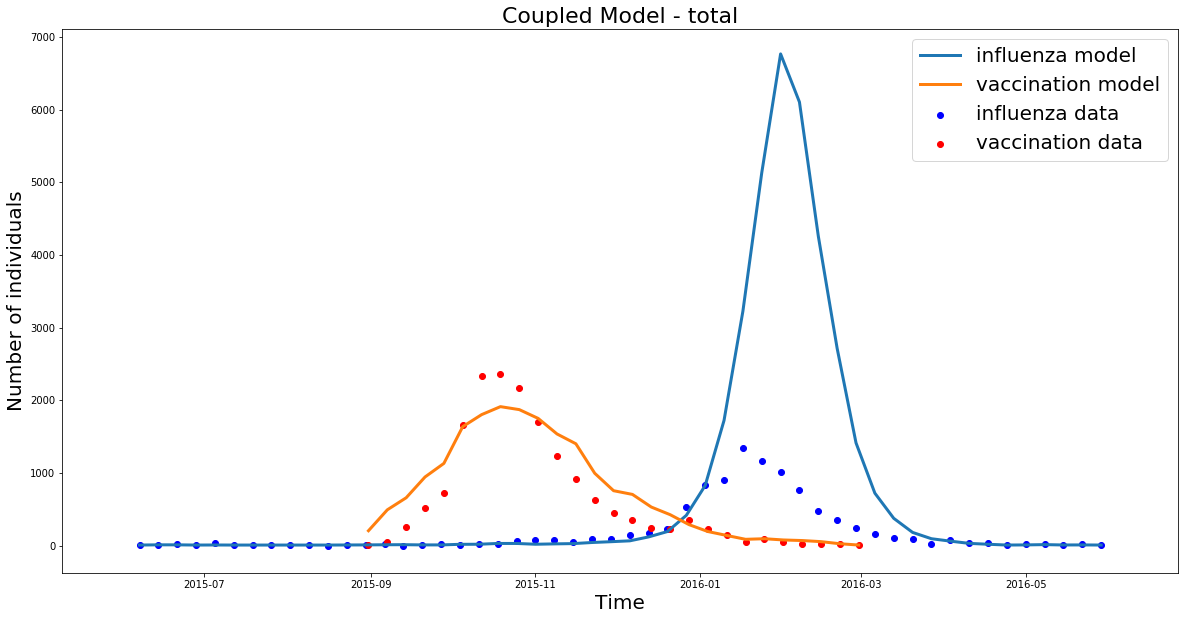

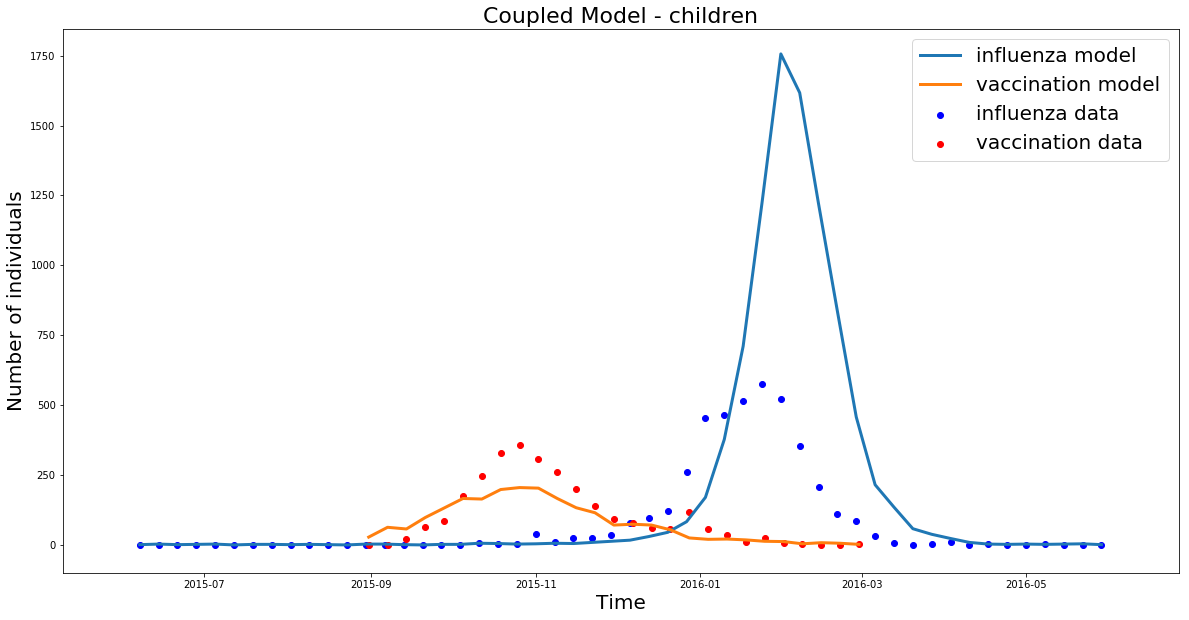

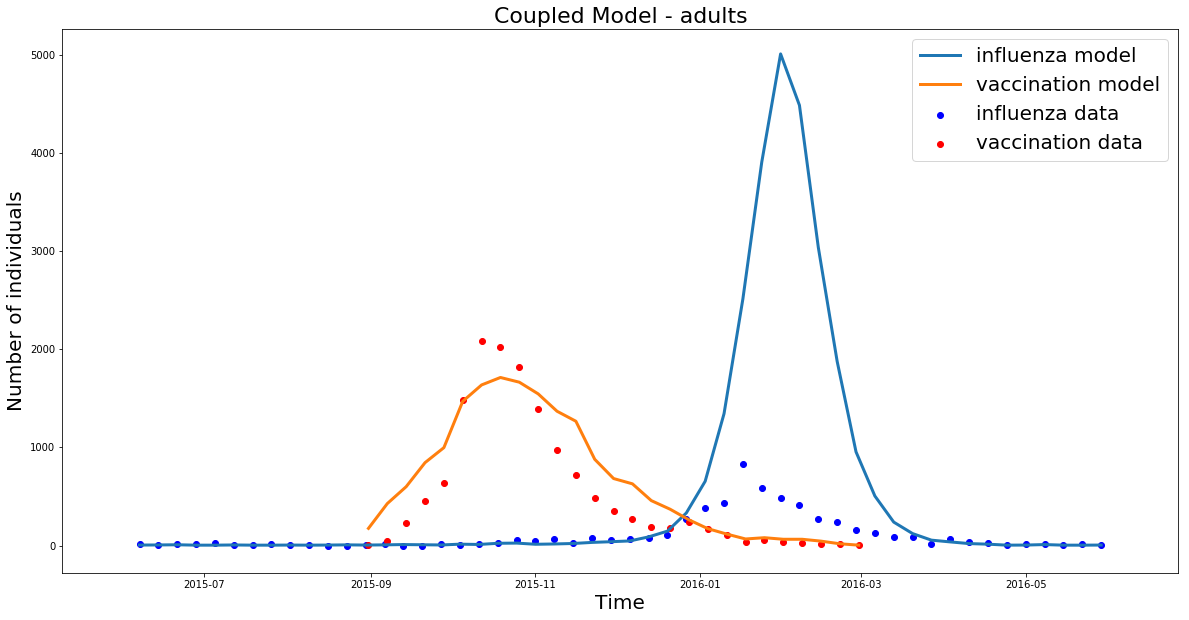

In [104]:
model.plot_aggregated_fit_coupled(model_results_homo, data_for_fit_i, data_for_fit_v, season, prep_data)
model.plot_aggregated_fit_coupled(model_results_homo, data_for_fit_i, data_for_fit_v, season, prep_data, age=0)
model.plot_aggregated_fit_coupled(model_results_homo, data_for_fit_i, data_for_fit_v, season, prep_data, age=1)

In [107]:
model.calc_correlation_fit_flu(model_results_homo, data_for_fit_i, prep_data, season, by_subdist_age=True, weighted=True, smooth=True, window=4)

(0.8284059977552084, 4.69602746262026e-06)

In [95]:
# window = 4

# corr_agg_ws = [model.calc_correlation_fit_flu(median_model_results_coupled[season], data_for_fit_i, prep_data, season, weighted=True, smooth=True, window=window)[0]
#                for season in model.seasons]

# corr_subdist_ws = [model.calc_correlation_fit_flu(median_model_results_coupled[season], data_for_fit_i, prep_data, season, by_subdist=True, weighted=True, smooth=True, window=window)[0]
#                    for season in model.seasons]

# corr_subdist_age_ws = [model.calc_correlation_fit_flu(median_model_results_coupled[season], data_for_fit_i, prep_data, season, by_subdist_age=True, weighted=True, smooth=True, window=window)[0]
#                        for season in model.seasons]

# # p-values
# corr_agg_ws_p = [model.calc_correlation_fit_flu(median_model_results_coupled[season], data_for_fit_i, prep_data, season, weighted=True, smooth=True, window=window)[1]
#                  for season in model.seasons]

# corr_subdist_ws_p = [model.calc_correlation_fit_flu(median_model_results_coupled[season], data_for_fit_i, prep_data, season, by_subdist=True, weighted=True, smooth=True, window=window)[1]
#                      for season in model.seasons]

# corr_subdist_age_ws_p = [model.calc_correlation_fit_flu(median_model_results_coupled[season], data_for_fit_i, prep_data, season, by_subdist_age=True, weighted=True, smooth=True, window=window)[1]
#                          for season in model.seasons]

In [ ]:
print(f'correlation fit aggregated: r:{np.array(corr_agg_ws).mean():.2f}, p: {np.array(corr_agg_ws_p).mean()}')
print(f'correlation fit by subdist: r:{np.array(corr_subdist_ws).mean():.2f}, p:{np.array(corr_subdist_ws_p).mean()}')
print(f'correlation fit by subdist and age: r:{np.array(corr_subdist_age_ws)[1:].mean():.2f}, p:{np.array(corr_subdist_age_ws_p).mean()}')

In [ ]:
model.plot_infection_rate_by_age_influenza(model_results_homo, data_for_fit_i, prep_data, season)

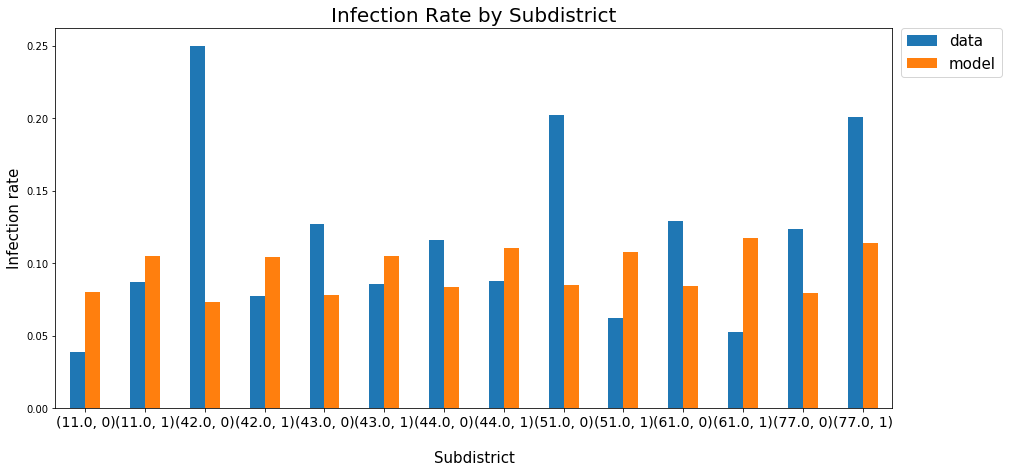

In [43]:
model.plot_infection_rate_influenza(model_results_homo, prep_data, season=season)

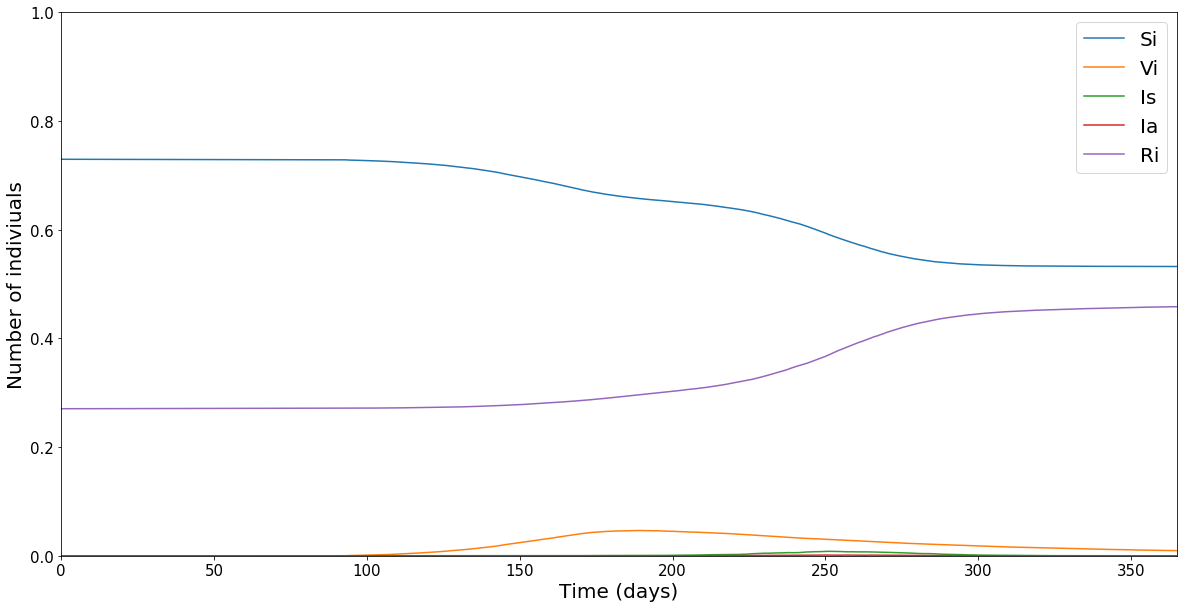

In [44]:
model.plot_model_states(model_results_homo, prep_data)

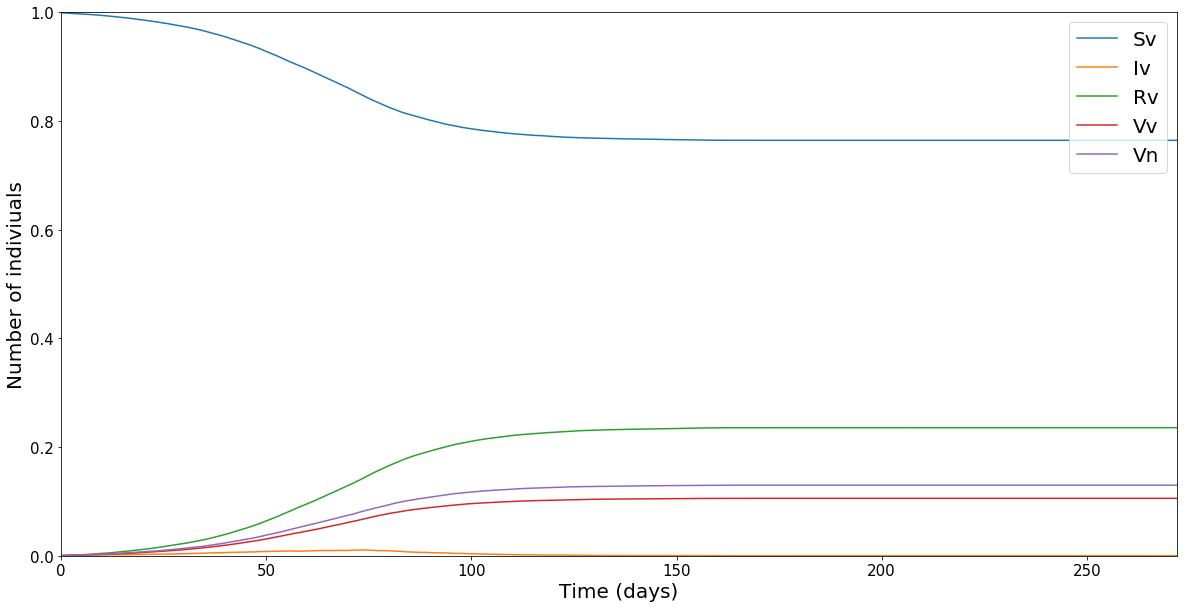

In [45]:
model.plot_model_states_vacc(model_results_homo, prep_data)

Plot influenza

In [20]:
# model.plot_aggregated_fit_influenza(model_results, data_for_fit, season)
# model.plot_aggregated_fit_influenza(model_results, data_for_fit, season, age=0)
# model.plot_aggregated_fit_influenza(model_results, data_for_fit, season, age=1)

Plot vaccination

In [2]:
# model_results['new_I'] = model_results['new_Iv'][:182]
# model_results['new_I_by_age'] = [model_results['new_Iv_by_age'][0][:182], model_results['new_Iv_by_age'][1][:182]]
# model.plot_aggregated_fit(model_results, data_for_fit_v)
# model.plot_aggregated_fit(model_results, data_for_fit_v, age=0)
# model.plot_aggregated_fit(model_results, data_for_fit_v, age=1)

# OLD

#### Vaccination model

In [435]:
with open('L:/Dor/Data/vaccination_model/grid_search/grid_search_res.pickle', 'rb') as pickle_in:
    grid_search_res_v = pickle.load(pickle_in)

In [436]:
# Max likelihood subdist
liklihood_subdist_v = max(grid_search_res_v, key=lambda x: x['log_likelihood_subdist'])

print(f"Max likelihood by subdist: {int(liklihood_subdist_v['log_likelihood_subdist']):,d}")
print(liklihood_subdist_v)

Max likelihood by subdist: 64,237
{'parameters': {'beta': 0.016534620615599377, 'delta': 0.38356614902224223, 'gamma': 0.20840689843177979, 'I_0_size': 0.001}, 'log_likelihood': 22892.00914133095, 'log_likelihood_age': 93881.4253592024, 'log_likelihood_subdist': 64237.72970598607}


In [437]:
parameters_v = liklihood_subdist_v['parameters']

#### Influenza model

In [419]:
parameters_i = {}
max_likelihoods = {}

# 2013-2016
for season in model.seasons:
    # Load grid search file
    with open(f'L:/Dor/data/coupled_model/grid_search/grid_search_{season}_m11_k1000_results.pickle', 'rb') as pickle_in:
        grid_search_res_i = pickle.load(pickle_in)
    
    # Get max likelihhod parameters
    liklihood_subdist_i = max(grid_search_res_i, key=lambda x: x['log_likelihood_subdist'])
    
    # Update parameters dictionary
    parameters_i[season] = liklihood_subdist_i['parameters'][season]
    
    # Update likelihoods
    max_likelihoods[season] = liklihood_subdist_i['log_likelihood_subdist']

    
# # 2017
# season = 2017
# with open('L:/Dor/data/coupled_model/grid_search/grid_search_2017_m11_k3000_results.pickle', 'rb') as pickle_in:
#     grid_search_res_i = pickle.load(pickle_in)
    
#     # Get max likelihhod parameters
#     liklihood_subdist_i = max(grid_search_res_i, key=lambda x: x['log_likelihood_subdist'])
    
#     # Update parameters dictionary
#     parameters_i[season] = liklihood_subdist_i['parameters'][season]
    
#     # Update likelihoods
#     max_likelihoods[season] = liklihood_subdist_i['log_likelihood_subdist']

In [420]:
max_likelihoods

{2011: 25680.30347994885,
 2012: 6802.081990843844,
 2013: 20692.573126474173,
 2014: 14330.364836244316,
 2015: 13368.259347393756,
 2016: 23606.825638159233,
 2017: 11182.21193947767}

In [9]:
# 2016   
# with open('L:/Dor/data/coupled_model/grid_search_2016_1_res.pickle', 'rb') as pickle_in:
#     grid_search_res_i = pickle.load(pickle_in)
    
# 2017
with open('L:/Dor/data/coupled_model/grid_search/grid_search_2017_m11_k3000_results.pickle', 'rb') as pickle_in:
    grid_search_res_i = pickle.load(pickle_in)

In [10]:
# Max likelihood subdist
liklihood_subdist_i = max(grid_search_res_i, key=lambda x: x['log_likelihood_subdist'])

print(f"Max likelihood by subdist: {int(liklihood_subdist_i['log_likelihood_subdist']):,d}")
print(liklihood_subdist_i)

Max likelihood by subdist: 11,011
{'parameters': {2017: {'beta': 0.0014925664260603726, 'delta': 1, 'phi': -3.5177977301984633, 'epsilon': 1}}, 'log_likelihood': -8281.035231507147, 'log_likelihood_age': 23429.269941055787, 'log_likelihood_subdist': 11011.650821499106}


In [11]:
# Set parameters
parameters_i = liklihood_subdist_i['parameters']

In [12]:
# 2011
parameters_i[2011] = {'beta': 0.0017,
                     'phi': (-33/52)*2*np.pi,
                     'delta': 1, 'epsilon': 1}

# 2012
parameters_i[2012] = {'beta': 0.00145,
                     'phi': (-31.5/52)*2*np.pi,
                     'delta': 1, 'epsilon': 1}

# 2013
parameters_i[2013] = {'beta': 0.00162,
                     'phi': (-31.8/52)*2*np.pi,
                     'delta': 1, 'epsilon': 1}

# 2014
parameters_i[2014] = {'beta': 0.0016,
                     'phi': (-33/52)*2*np.pi,
                     'delta': 1, 'epsilon': 1}

# 2015
parameters_i[2015] = {'beta': 0.001525,
                     'phi': (-32.5/52)*2*np.pi,
                     'delta': 1, 'epsilon': 1}

# 2016
parameters_i[2016] = {'beta': 0.0017,
                     'phi': (-31/52)*2*np.pi,
                     'delta': 1, 'epsilon': 1}

# # 2017
# parameters_i[2017] = {'beta': 0.001492,
#                      'phi': (-28.5/52)*2*np.pi,
#                      'delta': 1, 'epsilon': 1}

Export paramters

In [455]:
parameters = {'i': parameters_i, 'v': parameters_v}

In [457]:
# with open('../../data/coupled_model/parameters.pickle', 'wb') as pickle_out:
#     pickle.dump(parameters, pickle_out)

In [9]:
parameters

{'i': {2011: {'beta': 0.0016741155671954628,
   'delta': 1,
   'phi': -3.6831009861942943,
   'epsilon': 1},
  2012: {'beta': 0.0014399592578641389,
   'delta': 1,
   'phi': -3.871996125164333,
   'epsilon': 1},
  2013: {'beta': 0.001560503648164924,
   'delta': 1,
   'phi': -3.8059899225539073,
   'epsilon': 1},
  2014: {'beta': 0.00152060357488908,
   'delta': 1,
   'phi': -4.193496987377064,
   'epsilon': 1},
  2015: {'beta': 0.0015537127314578223,
   'delta': 1,
   'phi': -3.939751514871067,
   'epsilon': 1},
  2016: {'beta': 0.0016200311069644448,
   'delta': 1,
   'phi': -3.564040903378586,
   'epsilon': 1},
  2017: {'beta': 0.001525044942754729,
   'delta': 1,
   'phi': -3.5284301416282844,
   'epsilon': 1}},
 'v': {'beta': 0.016534620615599377,
  'delta': 0.38356614902224223,
  'gamma': 0.20840689843177979,
  'I_0_size': 0.001}}

In [351]:
# with open(f'../../data/coupled_model/parameters_i_all_seasons.pickle', 'wb') as pickle_out:
#     pickle.dump(parameters_i, pickle_out)

In [352]:
# parameters_i[2016]['beta'] = 0.00185
# parameters_i[2016]['phi'] = (-31/52)*2*np.pi